In [1]:
# IMPORT PACKAGES
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import pandas as pd
import datetime as dt
import geopandas as gpd

In [2]:
# OPEN FILES INTO LIST
no2_files = glob.glob('/home/averstyn/final_s5p/*.nc')
co_files = glob.glob('/home/averstyn/final_s5p/co/*.nc')

In [3]:
# CREATE XARRAY DATASETS
no2 = xr.open_mfdataset(no2_files)
co = xr.open_mfdataset(co_files)

In [4]:
# SELECT DATES OF AUGUST COMPLEX
co_2020 = co.sel(time=slice('2020-08-01','2020-12-31'))
no2_2020 = no2.sel(time=slice('2020-08-01','2020-12-31'))

co_2020avg = co_2020.mean(dim='time')
no2_2020avg = no2_2020.mean(dim='time')

augcomplex_codates = co.sel(time=slice('2020-08-16','2020-11-11'))
augcomplex_no2dates = no2.sel(time=slice('2020-08-16','2020-11-11'))

augcomplex_coavg = augcomplex_codates.mean(dim='time')
augcomplex_no2avg = augcomplex_no2dates.mean(dim='time')

augcomplex_coanoms = augcomplex_coavg - co_2020avg
augcomplex_no2anoms = augcomplex_no2avg - no2_2020avg

augcomplex_coavg['carbonmonoxide_total_column'] = augcomplex_coavg['carbonmonoxide_total_column']/augcomplex_coavg['carbonmonoxide_total_column'].max()
augcomplex_no2avg['nitrogendioxide_tropospheric_column'] = augcomplex_no2avg['nitrogendioxide_tropospheric_column']/augcomplex_no2avg['nitrogendioxide_tropospheric_column'].max()

augcomplex_co_arr = augcomplex_coavg['carbonmonoxide_total_column']
augcomplex_no2_arr = augcomplex_no2avg['nitrogendioxide_tropospheric_column']
augcomplex_ratio = augcomplex_no2_arr / augcomplex_co_arr

augcomplex_coords = [39.776, -122.673]

augcomplex_no2 = no2_2020.sel(lat=[39.776],lon=[360-122.673],method='nearest')
augcomplex_co = co_2020.sel(lat=[39.776],lon=[360-122.673],method='nearest')
augcomplex_no2_final = augcomplex_no2['nitrogendioxide_tropospheric_column'][:,0,0]
augcomplex_co_final = augcomplex_co['carbonmonoxide_total_column'][:,0,0]
augcomplex_time_ratio = augcomplex_no2_final/augcomplex_co_final

Text(0.5, 1.0, 'CO (08/16 - 10/31)')

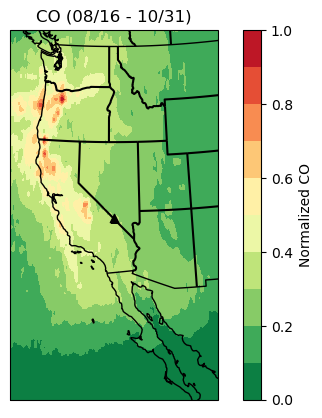

In [5]:
# PLOT GRIDDED CO TROPOMI DATA OF AUGUST COMPLEX
extent = [-125,-108,23,50]
clevs = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
trans = ccrs.PlateCarree()
ax.coastlines(zorder=100)
states = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                             facecolor='none')
cs = ax.contourf(augcomplex_coavg['lon'],augcomplex_coavg['lat'],augcomplex_coavg['carbonmonoxide_total_column'],
                 transform=trans,cmap='RdYlGn_r',levels=clevs)
ax.set_extent(extent)
ax.add_feature(states,zorder=3,linewidth=1.5,edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.scatter(augcomplex_coords[1],augcomplex_coords[0],marker='^',c='black')
plt.colorbar(cs, label = 'Normalized CO')
plt.title('CO (08/16 - 10/31)')

Text(0.5, 1.0, 'NO2 (08/16 - 10/31)')

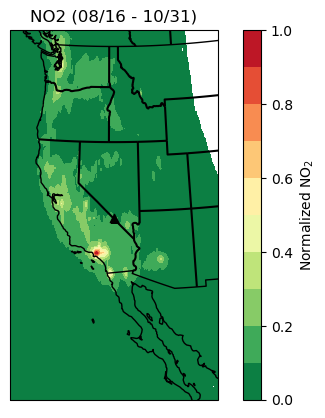

In [6]:
# PLOT GRIDDED NO2 TROPOMI DATA OF AUGUST COMPLEX
extent = [-125,-108,23,50]
clevs = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
trans = ccrs.PlateCarree()
ax.coastlines(zorder=100)
states = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                             facecolor='none')
cs = ax.contourf(augcomplex_no2avg['lon'],augcomplex_no2avg['lat'],augcomplex_no2avg['nitrogendioxide_tropospheric_column'],
                 transform=trans,cmap='RdYlGn_r',levels=clevs)
ax.set_extent(extent)
ax.add_feature(states,zorder=3,linewidth=1.5,edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.scatter(augcomplex_coords[1],augcomplex_coords[0],marker='^',c='black')
plt.colorbar(cs, label = 'Normalized NO$_2$')
plt.title('NO2 (08/16 - 10/31)')

/home/averstyn/.conda/envs/clim_data4/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/averstyn/.conda/envs/clim_data4/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Text(0.5, 1.0, 'Ratio of NO$_2$ to CO \n (08/16 - 10/31)')

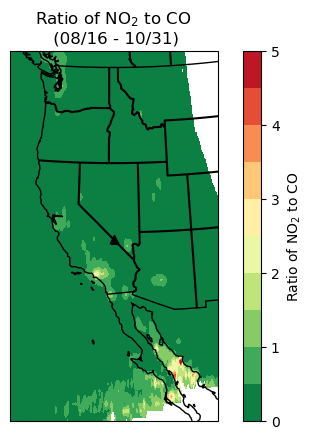

In [7]:
# PLOT GRIDDED CO TROPOMI DATA OF AUGUST COMPLEX
extent = [-125,-108,23,50]
clevs = np.arange(0,5.5,0.5)
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
trans = ccrs.PlateCarree()
ax.coastlines(zorder=100)
states = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                             facecolor='none')
cs = ax.contourf(augcomplex_ratio['lon'],augcomplex_ratio['lat'],augcomplex_ratio,
                 transform=trans,cmap='RdYlGn_r',levels=clevs)
ax.set_extent(extent)
ax.add_feature(states,zorder=3,linewidth=1.5,edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.scatter(augcomplex_coords[1],augcomplex_coords[0],marker='^',c='black')
plt.colorbar(cs, label = 'Ratio of NO$_2$ to CO')
plt.title('Ratio of NO$_2$ to CO \n (08/16 - 10/31)')

Text(0.5, 1.0, 'CO Anomalies \n (08/16 - 10/31)')

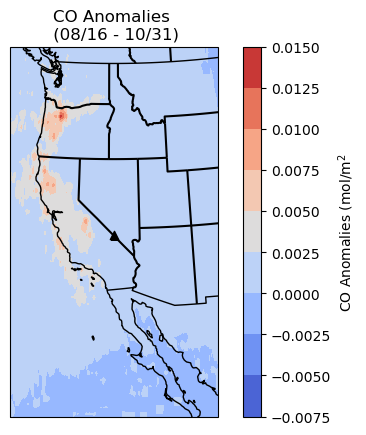

In [8]:
# PLOT GRIDDED CO TROPOMI ANOMS OF AUGUST COMPLEX
extent = [-125,-108,23,50]
clevs = [-0.01,-0.0075,-0.005,-0.0025,0,0.0025,0.005,0.0075,0.01]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
trans = ccrs.PlateCarree()
ax.coastlines(zorder=100)
states = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                             facecolor='none')
cs = ax.contourf(augcomplex_coanoms['lon'],augcomplex_coanoms['lat'],augcomplex_coanoms['carbonmonoxide_total_column'],
                 transform=trans,cmap='coolwarm')
ax.set_extent(extent)
ax.add_feature(states,zorder=3,linewidth=1.5,edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.scatter(augcomplex_coords[1],augcomplex_coords[0],marker='^',c='black')
plt.colorbar(cs, label = 'CO Anomalies (mol/m$^2$')
plt.title('CO Anomalies \n (08/16 - 10/31)')

Text(0.5, 1.0, 'NO$_2$ Anomalies \n (08/16 - 10/31)')

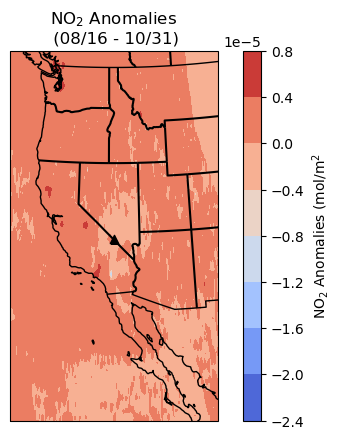

In [9]:
# PLOT GRIDDED NO2 TROPOMI ANOMS OF AUGUST COMPLEX
extent = [-125,-108,23,50]
#clevs = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
trans = ccrs.PlateCarree()
ax.coastlines(zorder=100)
states = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                             facecolor='none')
cs = ax.contourf(augcomplex_no2anoms['lon'],augcomplex_no2anoms['lat'],augcomplex_no2anoms['nitrogendioxide_tropospheric_column'],
                 transform=trans,cmap='coolwarm')
ax.set_extent(extent)
ax.add_feature(states,zorder=3,linewidth=1.5,edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.scatter(augcomplex_coords[1],augcomplex_coords[0],marker='^',c='black')
plt.colorbar(cs, label = 'NO$_2$ Anomalies (mol/m$^2$')
plt.title('NO$_2$ Anomalies \n (08/16 - 10/31)')

Text(0.5, 1.0, 'Nitrogen Dioxide and Carbon Monoxide Time Series')

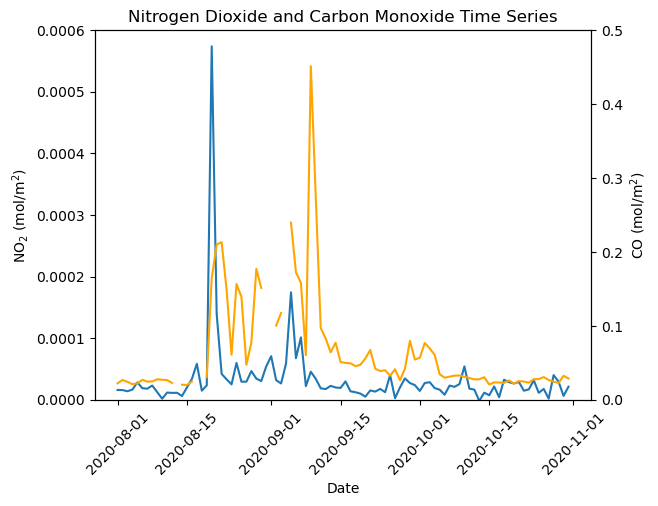

In [10]:
# TIME SERIES OF AUGUST COMPLEX
fig,ax = plt.subplots()
ax.plot(augcomplex_no2_final['time'],augcomplex_no2_final)
ax.set_xlabel('Date')
ax.set_ylim(0,0.0006)
plt.xticks(rotation=45)
ax.set_ylabel('NO$_2$ (mol/m$^2$)')
ax2 = ax.twinx()
ax2.plot(augcomplex_co_final['time'],augcomplex_co_final,c='orange')
ax2.set_ylabel('CO (mol/m$^2$)')
ax2.set_ylim(0,0.5)
plt.title('Nitrogen Dioxide and Carbon Monoxide Time Series')

Text(0.5, 1.0, 'Ratio of Nitrogen Dioxide to Carbon Monoxide')

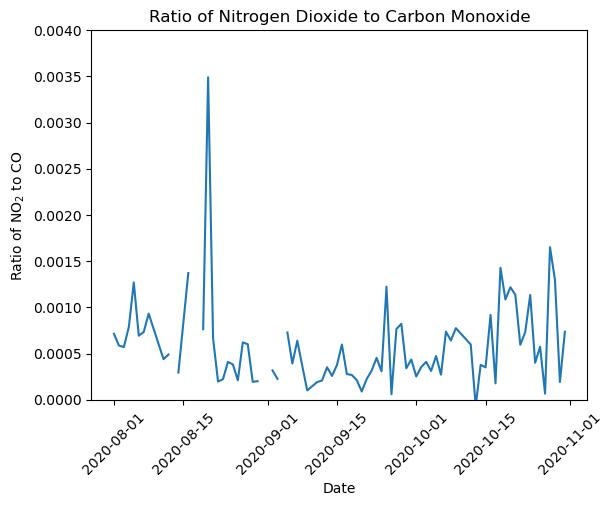

In [9]:
# PLOT RATIO OF NO2 / CO
plt.plot(augcomplex_time_ratio['time'],augcomplex_time_ratio)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Ratio of NO$_2$ to CO')
plt.ylim(0,0.004)
plt.title('Ratio of Nitrogen Dioxide to Carbon Monoxide')

In [11]:
# CREATE FUNCTIONS

def co_map(fire_coavg,coords,firename):
    extent = [-125,-108,23,50]
    clevs = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    central_lon = np.mean(extent[:2])
    central_lat = np.mean(extent[2:])
    ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
    trans = ccrs.PlateCarree()
    ax.coastlines(zorder=100)
    states = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                                 facecolor='none')
    cs = ax.contourf(fire_coavg['lon'],fire_coavg['lat'],fire_coavg['carbonmonoxide_total_column'],
                     transform=trans,cmap='RdYlGn_r',levels=clevs)
    ax.set_extent(extent)
    ax.add_feature(states,zorder=3,linewidth=1.5,edgecolor='black')
    ax.add_feature(cfeature.BORDERS)
    plt.colorbar(cs, label = 'Normalized CO')
    plt.title('CO - '+firename)
    
def no2_map(fire_no2avg,coords,firename):
    extent = [-125,-108,23,50]
    clevs = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    central_lon = np.mean(extent[:2])
    central_lat = np.mean(extent[2:])
    ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
    trans = ccrs.PlateCarree()
    ax.coastlines(zorder=100)
    states = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                                 facecolor='none')
    cs = ax.contourf(fire_no2avg['lon'],fire_no2avg['lat'],fire_no2avg['nitrogendioxide_tropospheric_column'],
                     transform=trans,cmap='RdYlGn_r',levels=clevs)
    ax.set_extent(extent)
    ax.add_feature(states,zorder=3,linewidth=1.5,edgecolor='black')
    ax.add_feature(cfeature.BORDERS)
    #ax.scatter(coords[1],coords[0],marker='^',c='black')
    plt.colorbar(cs, label = 'Normalized NO$_2$')
    plt.title('NO$_2$ - '+firename)
    
def ratio_map(fire_ratio,coords,firename):
    extent = [-125,-108,23,50]
    clevs = np.arange(0,3.25,0.25)
    central_lon = np.mean(extent[:2])
    central_lat = np.mean(extent[2:])
    ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
    trans = ccrs.PlateCarree()
    ax.coastlines(zorder=100)
    states = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                                 facecolor='none')
    cs = ax.contourf(fire_ratio['lon'],fire_ratio['lat'],fire_ratio,
                     transform=trans,cmap='RdYlGn_r',levels=clevs)
    ax.set_extent(extent)
    ax.add_feature(states,zorder=3,linewidth=1.5,edgecolor='black')
    ax.add_feature(cfeature.BORDERS)
    #ax.scatter(coords[1],coords[0],marker='^',c='black')
    plt.colorbar(cs, label = 'Ratio of NO$_2$ to CO')
    plt.title('Ratio of NO$_2$ to CO \n '+firename)
    
def co_anoms(fire_coanoms,coords,firename):
    extent = [-125,-108,23,50]
    clevs = [-0.01,-0.0075,-0.005,-0.0025,0,0.0025,0.005,0.0075,0.01]
    central_lon = np.mean(extent[:2])
    central_lat = np.mean(extent[2:])
    ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
    trans = ccrs.PlateCarree()
    ax.coastlines(zorder=100)
    states = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                                 facecolor='none')
    cs = ax.contourf(fire_coanoms['lon'],fire_coanoms['lat'],fire_coanoms['carbonmonoxide_total_column'],
                     transform=trans,cmap='coolwarm')
    ax.set_extent(extent)
    ax.add_feature(states,zorder=3,linewidth=1.5,edgecolor='black')
    ax.add_feature(cfeature.BORDERS)
    #ax.scatter(coords[1],coords[0],marker='^',c='black')
    plt.colorbar(cs, label = 'CO Anomalies (mol/m$^2$')
    plt.title('CO Anomalies \n '+firename)

def no2_anoms(fire_no2anoms,coords,firename):
    extent = [-125,-108,23,50]
    clevs = [-0.01,-0.0075,-0.005,-0.0025,0,0.0025,0.005,0.0075,0.01]
    central_lon = np.mean(extent[:2])
    central_lat = np.mean(extent[2:])
    ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
    trans = ccrs.PlateCarree()
    ax.coastlines(zorder=100)
    states = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                                 facecolor='none')
    cs = ax.contourf(fire_no2anoms['lon'],fire_no2anoms['lat'],fire_no2anoms['nitrogendioxide_tropospheric_column'],
                     transform=trans,cmap='coolwarm')
    ax.set_extent(extent)
    ax.add_feature(states,zorder=3,linewidth=1.5,edgecolor='black')
    ax.add_feature(cfeature.BORDERS)
    #ax.scatter(coords[1],coords[0],marker='^',c='black')
    plt.colorbar(cs, label = 'NO$_2$ Anomalies (mol/m$^2$')
    plt.title('NO$_2$ Anomalies \n '+firename)
    
def timeseries(fire_no2_final,fire_co_final,firename):
    fig,ax1 = plt.subplots()
    ax1.plot(fire_no2_final['time'],fire_no2_final,label='NO2')
    ax1.set_xlabel('Date')
    ax1.set_ylim(0,0.0006)
    plt.xticks(rotation=45)
    ax1.set_ylabel('NO$_2$ (mol/m$^2$)')
    ax2 = ax1.twinx()
    ax2.plot(fire_co_final['time'],fire_co_final,c='orange',label='CO')
    ax2.set_ylabel('CO (mol/m$^2$)')
    ax2.set_ylim(0,0.5)
    plt.title('Nitrogen Dioxide and Carbon Monoxide Time Series \n'+firename)
    plt.legend(['NO2','CO'])
    
def ratiotime(fire_time_ratio,firename):
    plt.plot(fire_time_ratio['time'],fire_time_ratio,c='black')
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Ratio of NO$_2$ to CO')
    plt.ylim(0,0.004)
    plt.grid(linestyle='--')
    plt.title('Ratio of Nitrogen Dioxide to Carbon Monoxide \n'+firename)

### AUGUST COMPLEX

In [12]:
# AUGUST COMPLEX DATA
co_2020 = co.sel(time=slice('2020-08-01','2020-12-31'))
no2_2020 = no2.sel(time=slice('2020-08-01','2020-12-31'))

co_2020avg = co_2020.mean(dim='time')
no2_2020avg = no2_2020.mean(dim='time')

augcomplex_codates = co.sel(time=slice('2020-08-16','2020-11-11'))
augcomplex_no2dates = no2.sel(time=slice('2020-08-16','2020-11-11'))

augcomplex_coavg = augcomplex_codates.mean(dim='time')
augcomplex_no2avg = augcomplex_no2dates.mean(dim='time')

augcomplex_coanoms = augcomplex_coavg - co_2020avg
augcomplex_no2anoms = augcomplex_no2avg - no2_2020avg

augcomplex_coavg['carbonmonoxide_total_column'] = augcomplex_coavg['carbonmonoxide_total_column']/augcomplex_coavg['carbonmonoxide_total_column'].max()
augcomplex_no2avg['nitrogendioxide_tropospheric_column'] = augcomplex_no2avg['nitrogendioxide_tropospheric_column']/augcomplex_no2avg['nitrogendioxide_tropospheric_column'].max()

augcomplex_co_arr = augcomplex_coavg['carbonmonoxide_total_column']
augcomplex_no2_arr = augcomplex_no2avg['nitrogendioxide_tropospheric_column']
augcomplex_ratio = augcomplex_no2_arr / augcomplex_co_arr

augcomplex_coords = [39.776, -122.673]

augcomplex_no2 = no2_2020.sel(lat=[39.776],lon=[360-122.673],method='nearest')
augcomplex_co = co_2020.sel(lat=[39.776],lon=[360-122.673],method='nearest')
augcomplex_no2_final = augcomplex_no2['nitrogendioxide_tropospheric_column'][:,0,0]
augcomplex_co_final = augcomplex_co['carbonmonoxide_total_column'][:,0,0]
augcomplex_time_ratio = augcomplex_no2_final/augcomplex_co_final

### SCU LIGHTNING COMPLEX 

In [13]:
# SCU LIGHTNING COMPLEX DATA
co_2020 = co.sel(time=slice('2020-08-01','2020-12-31'))
no2_2020 = no2.sel(time=slice('2020-08-01','2020-12-31'))

co_2020avg = co_2020.mean(dim='time')
no2_2020avg = no2_2020.mean(dim='time')

sculight_codates = co.sel(time=slice('2020-08-16','2020-10-01'))
sculight_no2dates = no2.sel(time=slice('2020-08-16','2020-10-01'))

sculight_coavg = sculight_codates.mean(dim='time')
sculight_no2avg = sculight_no2dates.mean(dim='time')

sculight_coanoms = sculight_coavg - co_2020avg
sculight_no2anoms = sculight_no2avg - no2_2020avg

sculight_coavg['carbonmonoxide_total_column'] = sculight_coavg['carbonmonoxide_total_column']/sculight_coavg['carbonmonoxide_total_column'].max()
sculight_no2avg['nitrogendioxide_tropospheric_column'] = sculight_no2avg['nitrogendioxide_tropospheric_column']/sculight_no2avg['nitrogendioxide_tropospheric_column'].max()

sculight_co_arr = sculight_coavg['carbonmonoxide_total_column']
sculight_no2_arr = sculight_no2avg['nitrogendioxide_tropospheric_column']
sculight_ratio = sculight_no2_arr / sculight_co_arr

sculight_coords = [37.439437, -121.30435]

sculight_no2 = no2_2020.sel(lat=[sculight_coords[0]],lon=[360+sculight_coords[1]],method='nearest')
sculight_co = co_2020.sel(lat=[sculight_coords[0]],lon=[360+sculight_coords[1]],method='nearest')
sculight_no2_final = sculight_no2['nitrogendioxide_tropospheric_column'][:,0,0]
sculight_co_final = sculight_co['carbonmonoxide_total_column'][:,0,0]
sculight_time_ratio = sculight_no2_final/sculight_co_final

### LNU LIGHTNING COMPLEX

In [14]:
# LNU LIGHTNING COMPLEX DATA
co_2020 = co.sel(time=slice('2020-08-01','2020-12-31'))
no2_2020 = no2.sel(time=slice('2020-08-01','2020-12-31'))

co_2020avg = co_2020.mean(dim='time')
no2_2020avg = no2_2020.mean(dim='time')

lnulight_codates = co.sel(time=slice('2020-08-17','2020-10-02'))
lnulight_no2dates = no2.sel(time=slice('2020-08-17','2020-10-02'))

lnulight_coavg = lnulight_codates.mean(dim='time')
lnulight_no2avg = lnulight_no2dates.mean(dim='time')

lnulight_coanoms = lnulight_coavg - co_2020avg
lnulight_no2anoms = lnulight_no2avg - no2_2020avg

lnulight_coavg['carbonmonoxide_total_column'] = lnulight_coavg['carbonmonoxide_total_column']/lnulight_coavg['carbonmonoxide_total_column'].max()
lnulight_no2avg['nitrogendioxide_tropospheric_column'] = lnulight_no2avg['nitrogendioxide_tropospheric_column']/lnulight_no2avg['nitrogendioxide_tropospheric_column'].max()

lnulight_co_arr = lnulight_coavg['carbonmonoxide_total_column']
lnulight_no2_arr = lnulight_no2avg['nitrogendioxide_tropospheric_column']
lnulight_ratio = lnulight_no2_arr / lnulight_co_arr

lnulight_coords = [38.48193, -122.14864]

lnulight_no2 = no2_2020.sel(lat=[lnulight_coords[0]],lon=[360+lnulight_coords[1]],method='nearest')
lnulight_co = co_2020.sel(lat=[lnulight_coords[0]],lon=[360+lnulight_coords[1]],method='nearest')
lnulight_no2_final = lnulight_no2['nitrogendioxide_tropospheric_column'][:,0,0]
lnulight_co_final = lnulight_co['carbonmonoxide_total_column'][:,0,0]
lnulight_time_ratio = lnulight_no2_final/lnulight_co_final

### DIXIE FIRE

In [15]:
# DIXIE FIRE DATA
co_2021 = co.sel(time=slice('2021-08-01','2021-12-31'))
no2_2021 = no2.sel(time=slice('2021-08-01','2021-12-31'))

co_2021avg = co_2021.mean(dim='time')
no2_2021avg = no2_2021.mean(dim='time')

dixie_codates = co.sel(time=slice('2021-08-01','2021-10-25'))
dixie_no2dates = no2.sel(time=slice('2021-08-01','2021-10-25'))

dixie_coavg = dixie_codates.mean(dim='time')
dixie_no2avg = dixie_no2dates.mean(dim='time')

dixie_coanoms = dixie_coavg - co_2021avg
dixie_no2anoms = dixie_no2avg - no2_2021avg

dixie_coavg['carbonmonoxide_total_column'] = dixie_coavg['carbonmonoxide_total_column']/dixie_coavg['carbonmonoxide_total_column'].max()
dixie_no2avg['nitrogendioxide_tropospheric_column'] = dixie_no2avg['nitrogendioxide_tropospheric_column']/dixie_no2avg['nitrogendioxide_tropospheric_column'].max()

dixie_co_arr = dixie_coavg['carbonmonoxide_total_column']
dixie_no2_arr = dixie_no2avg['nitrogendioxide_tropospheric_column']
dixie_ratio = dixie_no2_arr / dixie_co_arr

dixie_coords = [39.871306, -121.389439]

dixie_no2 = no2_2021.sel(lat=[dixie_coords[0]],lon=[360+dixie_coords[1]],method='nearest')
dixie_co = co_2021.sel(lat=[dixie_coords[0]],lon=[360+dixie_coords[1]],method='nearest')
dixie_no2_final = dixie_no2['nitrogendioxide_tropospheric_column'][:,0,0]
dixie_co_final = dixie_co['carbonmonoxide_total_column'][:,0,0]
dixie_time_ratio = dixie_no2_final/dixie_co_final

### MONUMENT FIRE

In [16]:
# MONUMENT FIRE DATA
co_2021 = co.sel(time=slice('2021-08-01','2021-12-31'))
no2_2021 = no2.sel(time=slice('2021-08-01','2021-12-31'))

co_2021avg = co_2021.mean(dim='time')
no2_2021avg = no2_2021.mean(dim='time')

mon_codates = co.sel(time=slice('2021-08-01','2021-10-26'))
mon_no2dates = no2.sel(time=slice('2021-08-01','2021-10-26'))

mon_coavg = mon_codates.mean(dim='time')
mon_no2avg = mon_no2dates.mean(dim='time')

mon_coanoms = mon_coavg - co_2021avg
mon_no2anoms = mon_no2avg - no2_2021avg

mon_coavg['carbonmonoxide_total_column'] = mon_coavg['carbonmonoxide_total_column']/mon_coavg['carbonmonoxide_total_column'].max()
mon_no2avg['nitrogendioxide_tropospheric_column'] = mon_no2avg['nitrogendioxide_tropospheric_column']/mon_no2avg['nitrogendioxide_tropospheric_column'].max()

mon_co_arr = mon_coavg['carbonmonoxide_total_column']
mon_no2_arr = mon_no2avg['nitrogendioxide_tropospheric_column']
mon_ratio = mon_no2_arr / mon_co_arr

mon_coords = [40.752, -123.337]

mon_no2 = no2_2021.sel(lat=[mon_coords[0]],lon=[360+mon_coords[1]],method='nearest')
mon_co = co_2021.sel(lat=[mon_coords[0]],lon=[360+mon_coords[1]],method='nearest')
mon_no2_final = mon_no2['nitrogendioxide_tropospheric_column'][:,0,0]
mon_co_final = mon_co['carbonmonoxide_total_column'][:,0,0]
mon_time_ratio = mon_no2_final/mon_co_final

### CALDOR FIRE

In [17]:
# CALDOR FIRE DATA
co_2021 = co.sel(time=slice('2021-08-01','2021-12-31'))
no2_2021 = no2.sel(time=slice('2021-08-01','2021-12-31'))

co_2021avg = co_2021.mean(dim='time')
no2_2021avg = no2_2021.mean(dim='time')

cal_codates = co.sel(time=slice('2021-08-14','2021-10-21'))
cal_no2dates = no2.sel(time=slice('2021-08-14','2021-10-21'))

cal_coavg = cal_codates.mean(dim='time')
cal_no2avg = cal_no2dates.mean(dim='time')

cal_coanoms = cal_coavg - co_2021avg
cal_no2anoms = cal_no2avg - no2_2021avg

cal_coavg['carbonmonoxide_total_column'] = cal_coavg['carbonmonoxide_total_column']/cal_coavg['carbonmonoxide_total_column'].max()
cal_no2avg['nitrogendioxide_tropospheric_column'] = cal_no2avg['nitrogendioxide_tropospheric_column']/cal_no2avg['nitrogendioxide_tropospheric_column'].max()

cal_co_arr = cal_coavg['carbonmonoxide_total_column']
cal_no2_arr = cal_no2avg['nitrogendioxide_tropospheric_column']
cal_ratio = cal_no2_arr / cal_co_arr

cal_coords = [38.586, -120.537833]

cal_no2 = no2_2021.sel(lat=[cal_coords[0]],lon=[360+cal_coords[1]],method='nearest')
cal_co = co_2021.sel(lat=[cal_coords[0]],lon=[360+cal_coords[1]],method='nearest')
cal_no2_final = cal_no2['nitrogendioxide_tropospheric_column'][:,0,0]
cal_co_final = cal_co['carbonmonoxide_total_column'][:,0,0]
cal_time_ratio = cal_no2_final/cal_co_final

### RIVER COMPLEX 

In [18]:
# RIVER COMPLEX DATA
co_2021 = co.sel(time=slice('2021-08-01','2021-12-31'))
no2_2021 = no2.sel(time=slice('2021-08-01','2021-12-31'))

co_2021avg = co_2021.mean(dim='time')
no2_2021avg = no2_2021.mean(dim='time')

river_codates = co.sel(time=slice('2021-08-01','2021-10-26'))
river_no2dates = no2.sel(time=slice('2021-08-01','2021-10-26'))

river_coavg = river_codates.mean(dim='time')
river_no2avg = river_no2dates.mean(dim='time')

river_coanoms = river_coavg - co_2021avg
river_no2anoms = river_no2avg - no2_2021avg

river_coavg['carbonmonoxide_total_column'] = river_coavg['carbonmonoxide_total_column']/river_coavg['carbonmonoxide_total_column'].max()
river_no2avg['nitrogendioxide_tropospheric_column'] = river_no2avg['nitrogendioxide_tropospheric_column']/river_no2avg['nitrogendioxide_tropospheric_column'].max()

river_co_arr = river_coavg['carbonmonoxide_total_column']
river_no2_arr = river_no2avg['nitrogendioxide_tropospheric_column']
river_ratio = river_no2_arr / river_co_arr

river_coords = [41.389, -123.057]

river_no2 = no2_2021.sel(lat=[river_coords[0]],lon=[360+river_coords[1]],method='nearest')
river_co = co_2021.sel(lat=[river_coords[0]],lon=[360+river_coords[1]],method='nearest')
river_no2_final = river_no2['nitrogendioxide_tropospheric_column'][:,0,0]
river_co_final = river_co['carbonmonoxide_total_column'][:,0,0]
river_time_ratio = river_no2_final/river_co_final

### ANTELOPE FIRE

In [19]:
# ANTELOPE FIRE DATA
co_2021 = co.sel(time=slice('2021-08-01','2021-12-31'))
no2_2021 = no2.sel(time=slice('2021-08-01','2021-12-31'))

co_2021avg = co_2021.mean(dim='time')
no2_2021avg = no2_2021.mean(dim='time')

ant_codates = co.sel(time=slice('2021-08-01','2021-10-15'))
ant_no2dates = no2.sel(time=slice('2021-08-01','2021-10-15'))

ant_coavg = ant_codates.mean(dim='time')
ant_no2avg = ant_no2dates.mean(dim='time')

ant_coanoms = ant_coavg - co_2021avg
ant_no2anoms = ant_no2avg - no2_2021avg

ant_coavg['carbonmonoxide_total_column'] = ant_coavg['carbonmonoxide_total_column']/ant_coavg['carbonmonoxide_total_column'].max()
ant_no2avg['nitrogendioxide_tropospheric_column'] = ant_no2avg['nitrogendioxide_tropospheric_column']/ant_no2avg['nitrogendioxide_tropospheric_column'].max()

ant_co_arr = ant_coavg['carbonmonoxide_total_column']
ant_no2_arr = ant_no2avg['nitrogendioxide_tropospheric_column']
ant_ratio = ant_no2_arr / ant_co_arr

ant_coords = [41.5289901, -121.9154934]

ant_no2 = no2_2021.sel(lat=[ant_coords[0]],lon=[360+ant_coords[1]],method='nearest')
ant_co = co_2021.sel(lat=[ant_coords[0]],lon=[360+ant_coords[1]],method='nearest')
ant_no2_final = ant_no2['nitrogendioxide_tropospheric_column'][:,0,0]
ant_co_final = ant_co['carbonmonoxide_total_column'][:,0,0]
ant_time_ratio = ant_no2_final/ant_co_final

### MCFARLAND FIRE

In [20]:
# MCFARLAND FIRE DATA
co_2021 = co.sel(time=slice('2021-08-01','2021-12-31'))
no2_2021 = no2.sel(time=slice('2021-08-01','2021-12-31'))

co_2021avg = co_2021.mean(dim='time')
no2_2021avg = no2_2021.mean(dim='time')

mcfar_codates = co.sel(time=slice('2021-08-01','2021-09-16'))
mcfar_no2dates = no2.sel(time=slice('2021-08-01','2021-09-16'))

mcfar_coavg = mcfar_codates.mean(dim='time')
mcfar_no2avg = mcfar_no2dates.mean(dim='time')

mcfar_coanoms = mcfar_coavg - co_2021avg
mcfar_no2anoms = mcfar_no2avg - no2_2021avg

mcfar_coavg['carbonmonoxide_total_column'] = mcfar_coavg['carbonmonoxide_total_column']/mcfar_coavg['carbonmonoxide_total_column'].max()
mcfar_no2avg['nitrogendioxide_tropospheric_column'] = mcfar_no2avg['nitrogendioxide_tropospheric_column']/mcfar_no2avg['nitrogendioxide_tropospheric_column'].max()

mcfar_co_arr = mcfar_coavg['carbonmonoxide_total_column']
mcfar_no2_arr = mcfar_no2avg['nitrogendioxide_tropospheric_column']
mcfar_ratio = mcfar_no2_arr / mcfar_co_arr

mcfar_coords = [41.5289901, -121.9154934]

mcfar_no2 = no2_2021.sel(lat=[mcfar_coords[0]],lon=[360+mcfar_coords[1]],method='nearest')
mcfar_co = co_2021.sel(lat=[mcfar_coords[0]],lon=[360+mcfar_coords[1]],method='nearest')
mcfar_no2_final = mcfar_no2['nitrogendioxide_tropospheric_column'][:,0,0]
mcfar_co_final = mcfar_co['carbonmonoxide_total_column'][:,0,0]
mcfar_time_ratio = mcfar_no2_final/mcfar_co_final

### NOTES

In [22]:
## FUNCTION NAMES
# co_map(fire_coavg,coords,firename)
# no2_map(fire_no2avg,coords,firename)
# ratio_map(fire_ratio,coords,firename)
# co_anoms(fire_coanoms,coords,firename)
# no2_anoms(fire_no2anoms,coords,firename)
# timeseries(fire_no2_final,fire_co_final,firename)
# ratiotime(fire_time_ratio,firename)

In [21]:
## FIRE NAMES
#### augcomplex
#### sculight
#### lnulight
#### dixie
#### mon
#### cal
#### river
#### ant
#### mcfar

## RUN THE FUNCTIONS

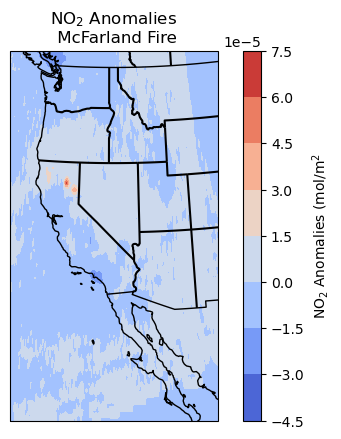

In [40]:
no2_anoms(mcfar_no2anoms,mcfar_coords,'McFarland Fire')
plt.savefig('/home/averstyn/CLIM680_project/mcfar_no2anoms')